In [1]:
# 결정트리 
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 스마트폰의 센서데이터
# 모델링 - 움직임의 대한 분류  - 새로운 움직임을 예측
# 데이터 - UCI Machine learning Repository...
# 모델 : 결정트리
# 분석 : 성능평가 지표-accuracy
#        하이퍼매개변수 변경에 따른 정확도 - 어떻게?
#        중요피처 분석        

In [3]:
# 개구리 펭귄 가치 나무늘보 다람쥐
# 날개가 있냐? 날수있냐, 털이있냐, 빨리 움직이냐

In [4]:
# 데이터 다운로드
# https://archive.ics.uci.edu/ml/machine-learning-databases/00240/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.__version__

'1.4.4'

In [7]:
featureNameDf = pd.read_csv("UCI_HAR_Dataset/features.txt",sep='\s+'  # sep=' '
            ,header=None,names=['index','feature_name'])

In [8]:
x_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt',sep='\s+'  # sep=' '
            ,header=None)
x_train.columns = featureNameDf['feature_name']

In [9]:
x_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt',sep='\s+'  # sep=' '
            ,header=None)
x_test.columns = featureNameDf['feature_name']

In [10]:
y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt',sep='\s+'  # sep=' '
            ,header=None)
y_train.columns = ['action']

In [11]:
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt',sep='\s+'  # sep=' '
            ,header=None)
y_test.columns = ['action']

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [13]:
label_name_df =  pd.read_csv('UCI_HAR_Dataset/activity_labels.txt',sep='\s+'
            ,header=None,names=['index','label'])

In [14]:
label_name_df.drop(columns='index',inplace=True)

In [15]:
label_name = label_name_df.iloc[:,0].values.tolist()

In [16]:
# 모델 구축
# ~~~~Classifier , LogisticRegression 분류
# ~~~~ Regressor 회귀
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier()

In [17]:
# 훈련
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
# 결정트리의 분류 분석: 평가데이터로 예측수행
y_predict = dtc.predict(x_test)

In [19]:
dtc.score(x_test,y_test)

0.8554462164913471

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8554462164913471

In [21]:
# 하이퍼 매개변수  dtc
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [22]:
# 지니계수
# 소득불균형 정도를 나타내는 지수 머신러닝에서는 데이터의 순도
# 값이 높을수록 순도가 낮은 데이터 집합
# 0이면 완전 순수한 데이터 집합

In [23]:

# 엔트로피 : 데이터집합의 혼잡도를 의미
# 집합에 다른 데이터 : 균일도가 떨어진다 - >혼잡도가 높다.. 엔트로가 높아짐
# 집합에 같은 데이터 : 균일도가 높아짐 - >혼잡도가 떨어진다.. 엔트로가 낮아짐
# 정보이득지수  : 혼잡도가 줄어들어서 얻게 되는 이득  1-엔트로피
# 결정트리 : 정보이득지수가 높은 피처를 분할 기준으로 사용

In [24]:
# 머신러닝은 하이퍼매개변수를 적절히 수정하면 정확도를 높일수 있다.

In [25]:
# 하이퍼라마메터 튜닝..
from sklearn.model_selection import GridSearchCV

In [26]:
params = {
    'max_depth' : range(6,15,2)
}

In [27]:
grid_cv = GridSearchCV(dtc,param_grid=params,cv=3
                       , scoring='accuracy',return_train_score=True)

In [28]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(6, 15, 2)}, return_train_score=True,
             scoring='accuracy')

In [29]:
 pd.DataFrame( grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.276084,0.020512,0.007315,0.000470,6,{'max_depth': 6},0.840881,0.863321,0.833469,0.845891,0.012691,1,0.962865,0.953887,0.943900,0.953551,0.007746
1,1.578000,0.080993,0.006990,0.000012,8,{'max_depth': 8},0.835169,0.833537,0.835918,0.834875,0.000994,2,0.989798,0.989798,0.980824,0.986807,0.004230
2,1.904131,0.075286,0.007650,0.000473,10,{'max_depth': 10},0.826193,0.833129,0.807347,0.822223,0.010894,4,0.995919,0.996735,0.992452,0.995036,0.001857
3,2.117334,0.097117,0.006979,0.000025,12,{'max_depth': 12},0.829865,0.837209,0.810612,0.825896,0.011215,3,0.997756,0.998572,0.996736,0.997688,0.000751
4,2.168206,0.074087,0.007323,0.000483,14,{'max_depth': 14},0.820889,0.829457,0.815510,0.821952,0.005743,5,0.998572,1.000000,0.998164,0.998912,0.000787


In [30]:
grid_cv.best_score_, grid_cv.best_params_

(0.8458905847120569, {'max_depth': 6})

In [31]:
best_dtc =  grid_cv.best_estimator_

In [32]:
# gridSearchCV - 최적의 파라메터를찾아주는 알고리즘
# 우리가 프로그램.... 경우의 수를 다 대입하면서 각각의 모델을 돌리고 최고의 성능을 내는
# 모델을 선택

In [33]:
# max_depth =  [1,2,3]

# def findParam(param,x_train,y_train)    
#     result = []
#     modellist = []
#     for num in param:
#         temp = DecisionTreeClassifier(max_depth=num)
#         temp.fit(x_train,y_train)
#         result.append(temp.score(x_train,y_train))
#         modellist.append(temp)
#     np.argmax(result)    

In [34]:
# 중요피처
best_dtc.feature_importances_
best_dtc.feature_names_in_
feature_df = pd.DataFrame(data=best_dtc.feature_importances_
                          ,index=best_dtc.feature_names_in_)
feature_df = feature_df.sort_values(by =0, ascending=False)
feature_df_top10 = feature_df.iloc[:10]
feature_df_top10


,0
tGravityAcc-min()-X,0.265996
fBodyAcc-mad()-X,0.225948
"angle(Y,gravityMean)",0.147739
fBodyAccMag-energy(),0.122738
"tGravityAcc-arCoeff()-Z,2",0.107932
fBodyGyro-maxInds-X,0.025478
"tBodyGyro-correlation()-Y,Z",0.017552
tGravityAcc-energy()-Y,0.017467
tBodyAccMag-arCoeff()1,0.013405
fBodyAcc-max()-Y,0.009379


In [35]:
import sklearn as sk
sk.__version__

'1.1.2'

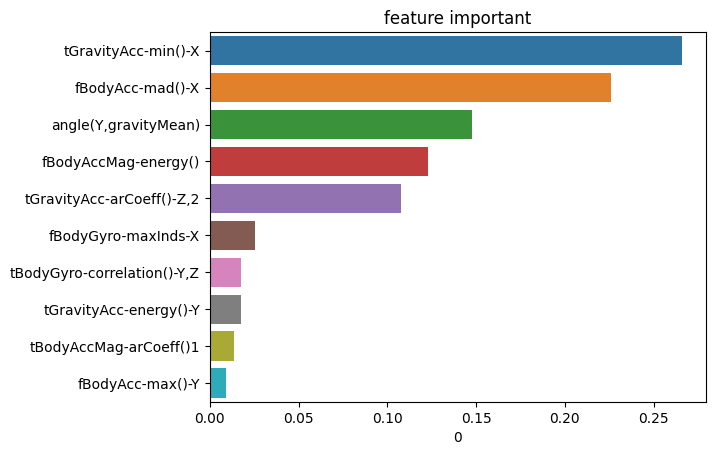

In [36]:
sns.barplot(data=feature_df_top10, x=0, y=feature_df_top10.index)
plt.title('feature important')
plt.show()

In [37]:
# 결정트리 시각화
# https://graphviz.org/download/

In [38]:
!pip install graphviz

In [39]:
from sklearn.tree import export_graphviz

In [40]:
# !conda install python-graphviz  # 터미널에서 실행하고
!pip install graphviz

In [41]:
fname = x_train.columns.values.tolist()
export_graphviz(best_dtc,out_file='tree.dot',class_names=label_name,feature_names=fname
                ,impurity=True, filled=True)

In [46]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)

In [47]:
# 시각화 파일로 저장
dot.render(filename='tree.png')

'tree.png.pdf'

In [48]:
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']